### Urna de Ehrenfest
![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Urn_problem_qtl1.svg/250px-Urn_problem_qtl1.svg.png)

Supongamos que tenemos dos cajas, etiquetadas con 1 y 2 y además $d$ bolas distribuidas de cierta forma en dichas cajas. Elegiremos un número aleatorio entre 1 y $d$, sacaremos la bola que contenga ese número y la cambiaremos de caja. Definimos $X_n$ como el número de bolas en la caja 1 después de la enésima repetición.

Este proceso es de Markov y tiene probabilidades de transición dadas por:

$$
P(x,y) =
\begin{cases}
\frac{x}{d} & \text{si } y = x-1 \\
\frac{d-x}{d} & \text{si } y = x+1 \\
0 & \text{e.o.c.}
\end{cases}
$$

A continuación haremos simulaciones de su comportamiento

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

class UrnaEhrenfest:

  # Definimos datos iniciales
  def __init__(self, N, d, caja1 = list):
    self.N = N
    self.d = d
    self.caja1 = caja1
    self.caja2 = list(set(range(1, d+1)) - set(caja1))
    self.xn = [len(self.caja1)]
    self.x = len(self.caja1)

  # Función para simular
  def simular(self):
    for i in range(self.N):
      u = random.randint(1, self.d)
      if u in self.caja1:
        self.x -= 1
        self.caja1.remove(u)
        self.caja2.append(u)
      else:
        self.x += 1
        self.caja2.remove(u)
        self.caja1.append(u)
      self.xn.append(self.x)
    return True

  # Función para imprimir la cadena
  def __str__(self):
    return self.xn

  # Función para graficar
  def plot(self):
    plt.style.use('seaborn-v0_8-dark')
    data = pd.DataFrame({'t': np.arange(0, self.N + 1), 'ue': self.xn})
    plt.figure(figsize=(7, 4))
    plt.plot(data['t'], data['ue'], color='darkslategray', linewidth=1)
    plt.grid()
    plt.title(f'Urna de Ehrenfest con {self.d} bolas', fontsize=14)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Valor del Proceso', fontsize=12)
    plt.show()


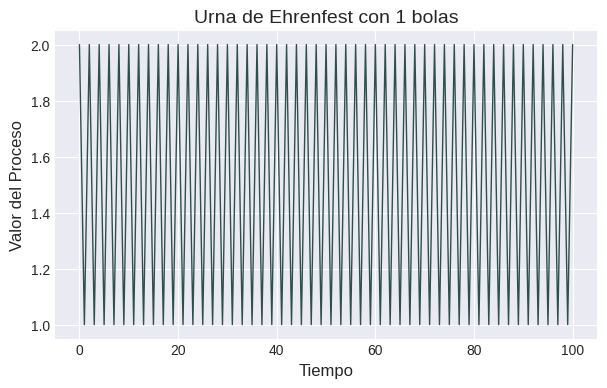

In [ ]:
ue1 = UrnaEhrenfest(100, 1, [4,1])
ue1.simular()
ue1.plot()

Ahora podemos hacer una clase que elija aleatoriamente la distribución inicial

In [ ]:
class UrnaEhrenfestAleatoria(UrnaEhrenfest):
    def __init__(self, N, d, caja1_size=None):
        # Si no se proporciona un tamaño para caja1, se elige aleatoriamente
        caja1_size = caja1_size if caja1_size is not None else random.randint(1, d)
        caja1 = random.sample(range(1, d+1), caja1_size)  # Elige aleatoriamente los elementos para caja1
        super().__init__(N, d, caja1)  # Llamada al constructor de la clase base

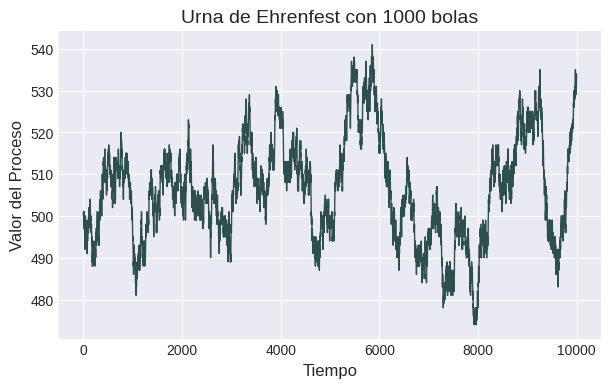

In [ ]:
ue2 = UrnaEhrenfestAleatoria(10000, 1000, 500)
ue2.simular()
ue2.plot()

Esto parece una caminata aleatoria, pero veamos qué pasa si empezamos con un número grande o pequeño de bolas en la caja 1.

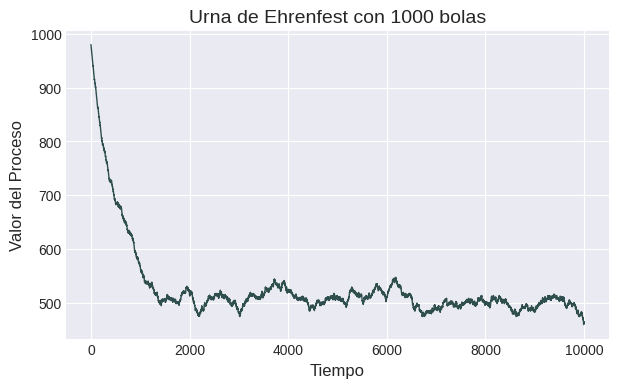

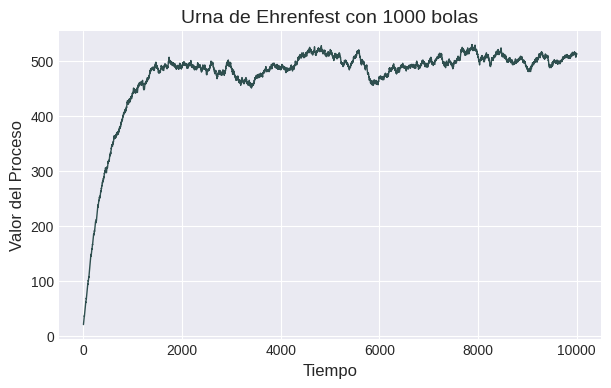

In [ ]:
ue3 = UrnaEhrenfestAleatoria(10000, 1000, 980)
ue3.simular()
ue3.plot()

ue4 = UrnaEhrenfestAleatoria(10000, 1000, 20)
ue4.simular()
ue4.plot()

¿Por qué crees que se dé este comportamiento?

### Ruina del Jugador
![](https://media.istockphoto.com/id/1158005632/es/foto/el-crupier-sostiene-una-bola-de-ruleta-en-un-casino-en-la-mano.jpg?s=612x612&w=0&k=20&c=8oruAF1PQdov8bHkHcKSuI2dRz6tcuKIlibwNgVY_qc=)

Un jugador juega cierto juego de apuestas, en el que gana 1 con probabilidad $p$ y pierde 1 con probabilidad $1-p$ y puede ganar a lo más d. Podemos pensar entonces su dinero en la partida n como una variable aleatoria, entonces obtenemos una sucesión $\{X_n\}_{n\in \mathbb{N}}$ con la siguiente distribución:

$$
\mathbb{P}[X_n = j] =
\begin{cases}
p & \text{si } j = 1 \\
1-p & \text{si } j = -1 \\
0 & \text{e.o.c.}
\end{cases}
$$

Entonces el proceso definido como $Y_n = \sum_{i=1}^nX_i$, es el capital del apostador hasta el tiempo n. Nota que el proceso $\{Y_n\}_{n \in \mathbb{N}}$ es una caminata aleatoria simple. Usaremos nuestro código del cuaderno pasado.



In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

class Ruina1:

  # Definimos los datos iniciales
  def __init__(self, iter, p, d, k_0):
    self.k_0 = k_0 # El capital inicial
    self.iter = iter # El número de iteraciones
    self.p = p # La proba de éxito
    self.d = d # El monto máximo
    self.caminata_aleatoria = [k_0]

  # Función para simular la caminata
  def simular(self):
    for i in range(1, self.iter):
        b = np.random.choice([-1, 1], p=[1 - self.p, self.p])
        self.caminata_aleatoria.append(self.caminata_aleatoria[-1] + b)
    return True

  # Función para imprimir la cadena
  def __str__(self):
    return str(self.caminata_aleatoria)

  # Función para graficar la cadena
  def plot(self):
    plt.style.use('seaborn-v0_8-dark')
    data = pd.DataFrame({'t': np.arange(1, self.iter + 1), 'c': self.caminata_aleatoria})
    plt.figure(figsize=(7, 4))
    plt.plot(data['t'], data['c'], color='darkslategray', linewidth=1)
    plt.grid()
    plt.title(f'Ruina del Jugador con p = {self.p}', fontsize=16)
    plt.xlabel('Tiempo', fontsize=12)
    plt.ylabel('Valor del Proceso', fontsize=12)
    plt.show()


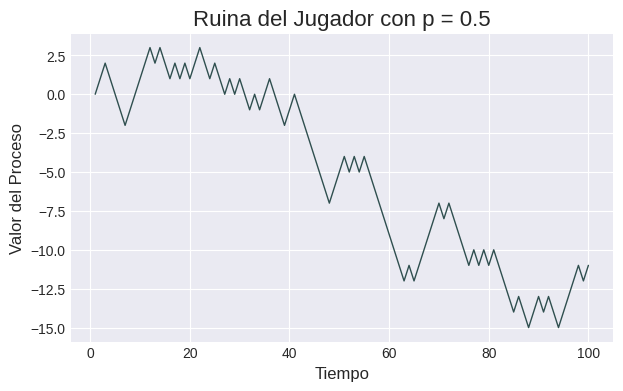

In [ ]:
ruina1 = Ruina1(100, 0.5, 100, 0)
ruina1.simular()
ruina1.plot()

Sin embargo, como ya sabemos simular caminatas aleatorias le agregaremos una condición extra:

Si el apostador llega a tener 0 o N, pierde todo el dinero o se gana todo, respectivamente, entonces el juego se termina. Esto puede escribire de manera probabilista de la siguiente manera:

$\mathbb{P}(X_{m} = 0 | X_n = 0) = 1 \quad \forall m \geq n$ \\

$\mathbb{P}(X_{m} = N | X_n = N) = 1 \quad \forall m \geq n$

Agregaremos esta condición a nuestra simulación



In [ ]:
class RuinadelJugador(Ruina1):

  def __init__(self, iter, p, d, k_0):
      super().__init__(iter, p, d, k_0)

  def simular(self):
    for i in range(1, self.iter):
      # Acá agregamos la condición de paro
      if self.caminata_aleatoria[-1] == 0 or self.caminata_aleatoria[-1] == self.d:
        self.caminata_aleatoria.append(self.caminata_aleatoria[-1])
        continue
      b = np.random.choice([-1, 1], p=[1 - self.p, self.p])
      self.caminata_aleatoria.append(self.caminata_aleatoria[-1] + b)
    return True


Ahora veamos cómo se ve esto

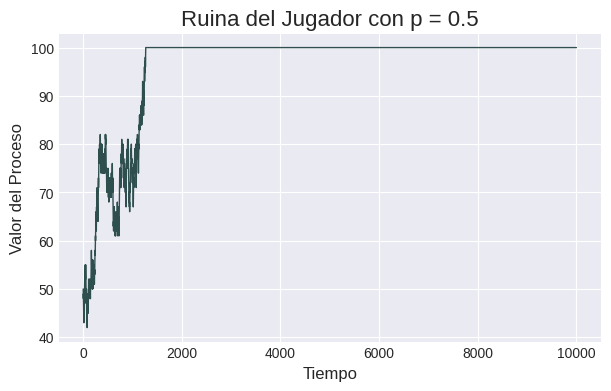

In [ ]:
ruina2 = RuinadelJugador(10000, 0.5, 100, 50)
ruina2.simular()
ruina2.plot()

Podemos notar que este proceso es una cadena de Markov con probabilidades de transición dadas por

$$
P(x,y) =
\begin{cases}
1-p & \text{si } y = x-1 \\
p & \text{si } y = x+1 \\
0 & \text{e.o.c.}
\end{cases}
$$

Nos preguntamos, ¿podrá existir una trayectoria del proceso donde nunca se extinga? Con esto en mente, tenemos la definición del tiempo de primera visita.

$$T_0 = mín\{n > 0 : X_n = 0\}$$ \\
$$T_d = mín\{n > 0 : X_n = d \}$$

Se puede probar que $T_0 < \infty$ o $T_d < \infty$ con probabilidad 1. Esto quiere decir que siempre se termina el juego en un tiempo finito. Analizaremos el avance del juego dependiendo del monto inicial.

Definamos

$$ u_k = \mathbb{P}(X_{T_0} = 0 | X_0 = k)$$

Esta es la probabilidad de arruinarte dado que tu capital inicial fue $k$

Se puede probar que si $q = 1-p$, entonces

$$
u_k =
\begin{cases}
\frac{d-k}{d} & \text{si } p = \frac{1}{2} \\
\frac{(q/p)^k-(q/p)^d}{1-(q/p)^d} & \text{si } p \neq \frac{1}{2} \\
\end{cases}
$$

Entonces podemos graficar a $u_k$ como una función de $k$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def u_k(p, d, k):
  if p == 0.5:
    return (d-k)/d
  else:
    q = 1-p
    num = (q/p) ** k - (q/p) ** d
    den = 1 - (q/p) ** d
    return num/den

datos_uk = pd.DataFrame({'k': np.arange(0, 51), 'u_k1': [u_k(0.1, 50, k) for k in np.arange(0, 51)], 'u_k2': [u_k(0.3, 50, k) for k in np.arange(0, 51)]
                      , 'u_k3': [u_k(0.5, 50, k) for k in range(0, 51)], 'u_k4': [u_k(0.55, 10500, k) for k in np.arange(0, 51)], 'u_k5': [u_k(0.7, 50, k) for k in np.arange(0, 51)],
                         'u_k6': [u_k(0.9, 50, k) for k in range(0, 51)], 'u_k7': [u_k(0.45, 50, k) for k in range(0, 51)]})


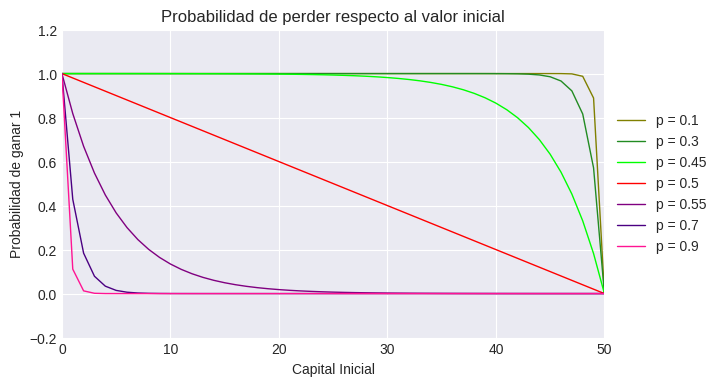

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(datos_uk['k'], datos_uk['u_k1'], color='olive', linewidth=1, label='p = 0.1')
plt.plot(datos_uk['k'], datos_uk['u_k2'], color='forestgreen', linewidth=1, label='p = 0.3')
plt.plot(datos_uk['k'], datos_uk['u_k7'], color='lime', linewidth=1, label='p = 0.45')
plt.plot(datos_uk['k'], datos_uk['u_k3'], color='red', linewidth=1, label='p = 0.5')
plt.plot(datos_uk['k'], datos_uk['u_k4'], color='purple', linewidth=1, label='p = 0.55')
plt.plot(datos_uk['k'], datos_uk['u_k5'], color='indigo', linewidth=1, label='p = 0.7')
plt.plot(datos_uk['k'], datos_uk['u_k6'], color ='deeppink', linewidth=1, label='p = 0.9')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Probabilidad de perder respecto al valor inicial')
plt.xlabel('Capital Inicial')
plt.ylabel('Probabilidad de ganar 1')
plt.style.use('seaborn-v0_8-dark')
plt.xlim(0, 50)
plt.ylim(-0.2, 1.2)
plt.grid()
plt.show()

Por otro lado, podemos graficar la probabilidad $u_k$ como una función de $p$ y notar cómo es su comportamiento.

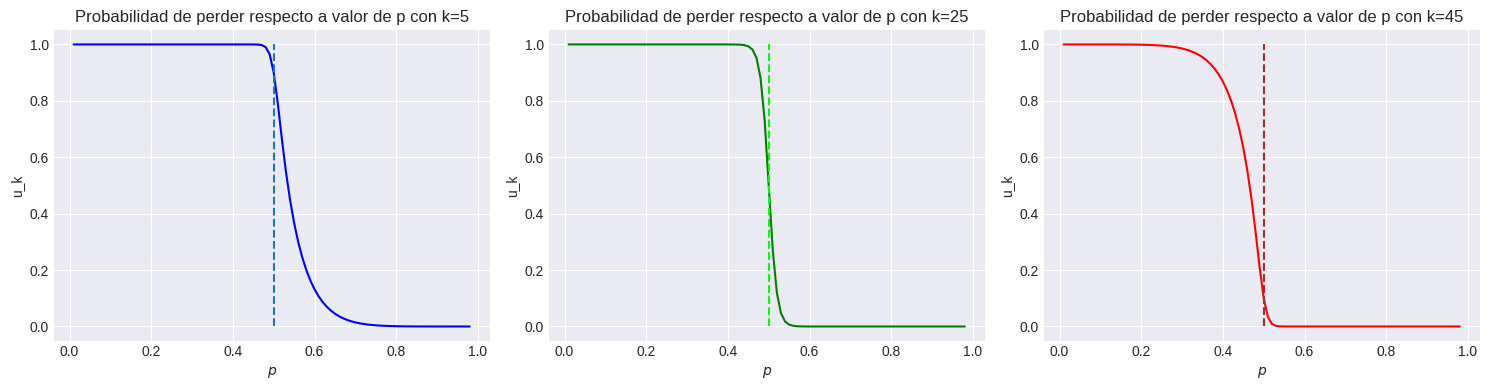

In [ ]:
datos_uk2 = pd.DataFrame({'p': np.linspace(0.01, 0.98, 98), 'u_k1': [u_k(p, 50, 5) for p in np.linspace(0.01, 0.98, 98)], 'u_k2': [u_k(p, 50, 25) for p in np.linspace(0.01, 0.98, 98)],
            'u_k3': [u_k(p, 50, 45) for p in np.linspace(0.01, 0.98, 98)]})

import matplotlib.pyplot as plt
import numpy as np


fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Primer subplot
axes[0].plot(datos_uk2['p'], datos_uk2['u_k1'], color='blue')
axes[0].set_title('Probabilidad de perder respecto a valor de p con k=5')
axes[0].set_xlabel(r'$p$')
axes[0].set_ylabel(r'u_k')
axes[0].plot([0.5 for _ in range(100)], [i for i in np.linspace(0,1,100)], '--')
axes[0].grid()

# Segundo subplot
axes[1].plot(datos_uk2['p'], datos_uk2['u_k2'], color='green')
axes[1].set_title('Probabilidad de perder respecto a valor de p con k=25')
axes[1].set_xlabel(r'$p$')
axes[1].set_ylabel(r'u_k')
axes[1].plot([0.5 for _ in range(100)], [i for i in np.linspace(0,1,100)], '--', color='lime')
axes[1].grid()

# Tercer subplot
axes[2].plot(datos_uk2['p'], datos_uk2['u_k3'], color='red')
axes[2].set_title('Probabilidad de ruina respecto a valor de p con k=45')
axes[2].set_xlabel(r'$p$')
axes[2].set_ylabel(r'u_k')
axes[2].plot([0.5 for _ in range(100)], [i for i in np.linspace(0,1,100)], '--', color = 'brown')
axes[2].grid()

plt.tight_layout()
plt.show()



Los valores de $u_k$ son **muy** sensibles al valor de $p$, es casi constante cuando está lejos de 1/2 y tiene cambios bruscos cuando llega a este valor. Esto es similar a la caminara aleatoria, si ocurría que $p>1-p$, entonces el valor esperado después de $n$ tiros era alejarte positivamente, y si ocurría lo contrario entonces era viceversa. Asimismo, cuando $p=1/2$ se tenía que en media nos quedábamos en el 0, y acá tienes la misma probabilidad de ganar que de perder. Ambos conceptos se "sienten" similares.

